<a href="https://colab.research.google.com/github/arcarrion/churn_prediction/blob/master/notebooks/01_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read data

In [0]:
raw_data = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [7]:
print(raw_data.head(5))

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]


In [8]:
print(raw_data.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [9]:
print(raw_data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [14]:
[raw_data[column].unique() for column in raw_data.columns.values]

[array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([0, 1]),
 array(['Yes', 'No'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 array(['No', 'Yes'], dtype=object),
 array(['No phone service', 'No', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['Yes', 'No', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No in

In [54]:
raw_data['TotalCharges_num'] = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')
display(raw_data.loc[raw_data.TotalCharges_num.isnull(), :])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_num
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


In [0]:
raw_data.loc[raw_data.TotalCharges.isnull(), 'TotalCharges_num'] = 0


,gender,percent
gender,,
Female,3488,49.52435
Male,3555,50.47565


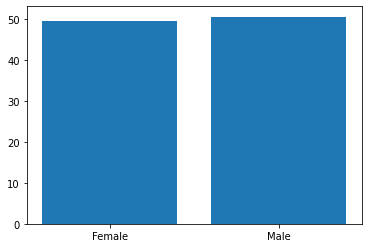

In [28]:
fig_gender, ax_gender = plt.subplots()
gender_data = raw_data.groupby('gender').agg({'gender': 'count'})
gender_data['percent'] = gender_data.gender*100/sum(gender_data.gender)
display(gender_data)
plt.bar(gender_data.index.values, gender_data.percent)
plt.show()


,SeniorCitizen,percent
SeniorCitizen,,
0,5901,83.785319
1,1142,16.214681


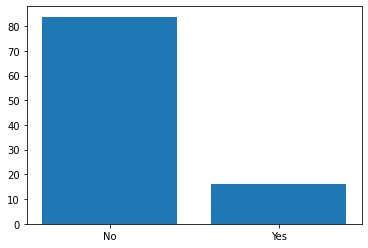

In [31]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('SeniorCitizen').agg({'SeniorCitizen': 'count'})
attribute_data['percent'] = attribute_data.SeniorCitizen*100/sum(attribute_data.SeniorCitizen)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.xticks(attribute_data.index.values, ('No', 'Yes'))
plt.show()

,Partner,percent
Partner,,
No,3641,51.69672
Yes,3402,48.30328


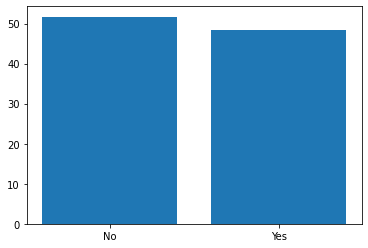

In [32]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('Partner').agg({'Partner': 'count'})
attribute_data['percent'] = attribute_data.Partner*100/sum(attribute_data.Partner)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.xticks(attribute_data.index.values, ('No', 'Yes'))
plt.show()

,Dependents,percent
Dependents,,
No,4933,70.041176
Yes,2110,29.958824


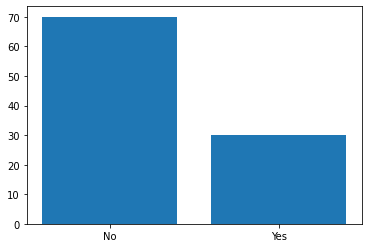

In [33]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('Dependents').agg({'Dependents': 'count'})
attribute_data['percent'] = attribute_data.Dependents*100/sum(attribute_data.Dependents)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.xticks(attribute_data.index.values, ('No', 'Yes'))
plt.show()

,tenure,percent
tenure,,
0,11,0.156183
1,613,8.703677
2,238,3.379242
3,200,2.839699
4,176,2.498935
...,...,...
68,100,1.419849
69,95,1.348857
70,119,1.689621


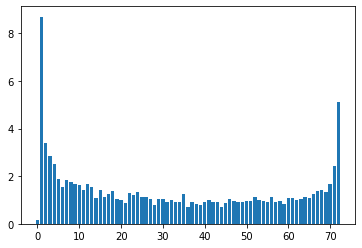

In [34]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('tenure').agg({'tenure': 'count'})
attribute_data['percent'] = attribute_data.tenure*100/sum(attribute_data.tenure)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,PhoneService,percent
PhoneService,,
No,682,9.683374
Yes,6361,90.316626


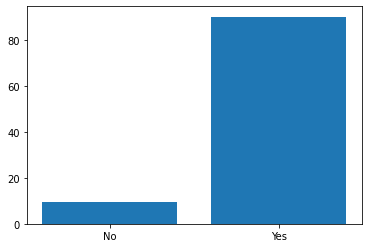

In [35]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('PhoneService').agg({'PhoneService': 'count'})
attribute_data['percent'] = attribute_data.PhoneService*100/sum(attribute_data.PhoneService)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,MultipleLines,percent
MultipleLines,,
No,3390,48.132898
No phone service,682,9.683374
Yes,2971,42.183729


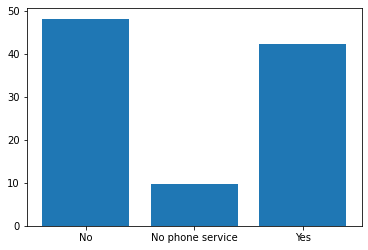

In [36]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('MultipleLines').agg({'MultipleLines': 'count'})
attribute_data['percent'] = attribute_data.MultipleLines*100/sum(attribute_data.MultipleLines)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,InternetService,percent
InternetService,,
DSL,2421,34.374556
Fiber optic,3096,43.958540
No,1526,21.666903


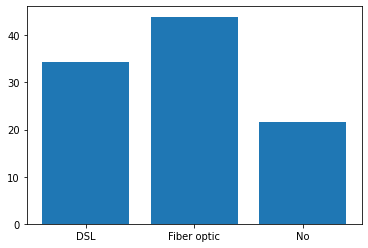

In [37]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('InternetService').agg({'InternetService': 'count'})
attribute_data['percent'] = attribute_data.InternetService*100/sum(attribute_data.InternetService)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,OnlineSecurity,percent
OnlineSecurity,,
No,3498,49.666335
No internet service,1526,21.666903
Yes,2019,28.666761


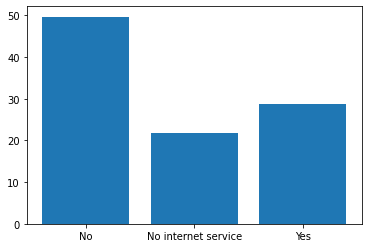

In [38]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('OnlineSecurity').agg({'OnlineSecurity': 'count'})
attribute_data['percent'] = attribute_data.OnlineSecurity*100/sum(attribute_data.OnlineSecurity)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,OnlineBackup,percent
OnlineBackup,,
No,3088,43.844952
No internet service,1526,21.666903
Yes,2429,34.488144


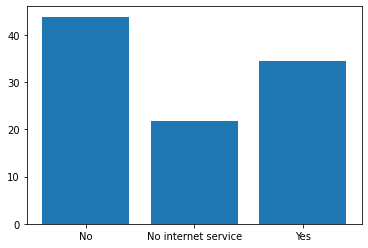

In [39]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('OnlineBackup').agg({'OnlineBackup': 'count'})
attribute_data['percent'] = attribute_data.OnlineBackup*100/sum(attribute_data.OnlineBackup)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,DeviceProtection,percent
DeviceProtection,,
No,3095,43.944342
No internet service,1526,21.666903
Yes,2422,34.388755


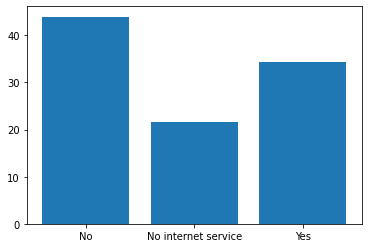

In [40]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('DeviceProtection').agg({'DeviceProtection': 'count'})
attribute_data['percent'] = attribute_data.DeviceProtection*100/sum(attribute_data.DeviceProtection)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,TechSupport,percent
TechSupport,,
No,3473,49.311373
No internet service,1526,21.666903
Yes,2044,29.021724


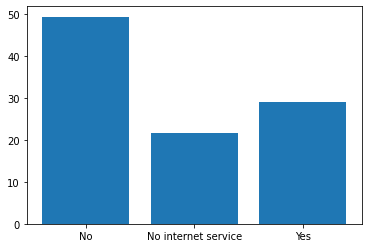

In [41]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('TechSupport').agg({'TechSupport': 'count'})
attribute_data['percent'] = attribute_data.TechSupport*100/sum(attribute_data.TechSupport)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,StreamingTV,percent
StreamingTV,,
No,2810,39.897771
No internet service,1526,21.666903
Yes,2707,38.435326


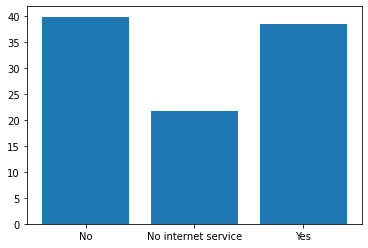

In [42]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('StreamingTV').agg({'StreamingTV': 'count'})
attribute_data['percent'] = attribute_data.StreamingTV*100/sum(attribute_data.StreamingTV)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,StreamingMovies,percent
StreamingMovies,,
No,2785,39.542808
No internet service,1526,21.666903
Yes,2732,38.790288


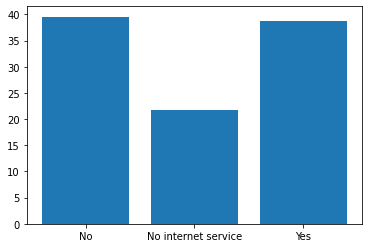

In [43]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('StreamingMovies').agg({'StreamingMovies': 'count'})
attribute_data['percent'] = attribute_data.StreamingMovies*100/sum(attribute_data.StreamingMovies)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,Contract,percent
Contract,,
Month-to-month,3875,55.019168
One year,1473,20.914383
Two year,1695,24.066449


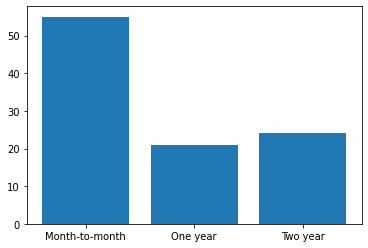

In [44]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('Contract').agg({'Contract': 'count'})
attribute_data['percent'] = attribute_data.Contract*100/sum(attribute_data.Contract)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,PaperlessBilling,percent
PaperlessBilling,,
No,2872,40.778078
Yes,4171,59.221922


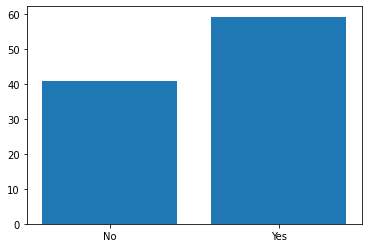

In [45]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('PaperlessBilling').agg({'PaperlessBilling': 'count'})
attribute_data['percent'] = attribute_data.PaperlessBilling*100/sum(attribute_data.PaperlessBilling)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

,PaymentMethod,percent
PaymentMethod,,
Bank transfer (automatic),1544,21.922476
Credit card (automatic),1522,21.610109
Electronic check,2365,33.579441
Mailed check,1612,22.887974


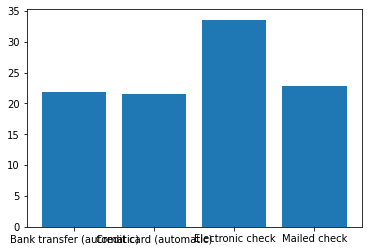

In [46]:
fig_gender, ax_gender = plt.subplots()
attribute_data = raw_data.groupby('PaymentMethod').agg({'PaymentMethod': 'count'})
attribute_data['percent'] = attribute_data.PaymentMethod*100/sum(attribute_data.PaymentMethod)
display(attribute_data)
plt.bar(attribute_data.index.values, attribute_data.percent)
plt.show()

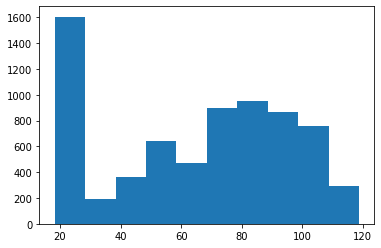

In [47]:
fig_gender, ax_gender = plt.subplots()
#attribute_data = raw_data.groupby('PaymentMethod').agg({'PaymentMethod': 'count'})
#attribute_data['percent'] = attribute_data.PaymentMethod*100/sum(attribute_data.PaymentMethod)
#display(attribute_data)
plt.hist(raw_data.MonthlyCharges)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


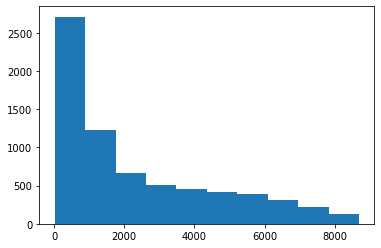

In [56]:
fig_gender, ax_gender = plt.subplots()
#attribute_data = raw_data.groupby('PaymentMethod').agg({'PaymentMethod': 'count'})
#attribute_data['percent'] = attribute_data.PaymentMethod*100/sum(attribute_data.PaymentMethod)
#display(attribute_data)
plt.hist(raw_data.TotalCharges_num)
plt.show()